In [79]:
maraton_data <- read.csv("results2005.csv")
head(maraton_data)

summary(maraton_data)

,display_name,age,gender,residence,pace,official_time,overall,gender_result,division_result,seconds,first_name,last_name
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,Hailu Negussie,25,M,Showa,00:05:01,2:11:45,1,1,1,7905,Hailu,Negussie
2,Wilson Onsare,28,M,Nairobi,00:05:02,2:12:21,2,2,2,7941,Wilson,Onsare
3,Benson Cherono,20,M,Baringo,00:05:03,2:12:48,3,3,1,7968,Benson,Cherono
4,Alan Culpepper,32,M,Lafayette,00:05:05,2:13:39,4,4,1,8019,Alan,Culpepper
5,Robert Kipkoech Cheruiyot,26,M,Nandi District,00:05:07,2:14:30,5,5,3,8070,Robert Kipkoech,Cheruiyot
6,Timothy Cherigat,28,M,,00:05:09,2:15:19,6,6,4,8119,Timothy,Cherigat


 display_name            age           gender           residence        
 Length:17528       Min.   :18.00   Length:17528       Length:17528      
 Class :character   1st Qu.:33.00   Class :character   Class :character  
 Mode  :character   Median :41.00   Mode  :character   Mode  :character  
                    Mean   :40.55                                        
                    3rd Qu.:48.00                                        
                    Max.   :83.00                                        
     pace           official_time         overall      gender_result  
 Length:17528       Length:17528       Min.   :    1   Min.   :    1  
 Class :character   Class :character   1st Qu.: 4376   1st Qu.: 2189  
 Mode  :character   Mode  :character   Median : 8764   Median : 4381  
                                       Mean   : 8763   Mean   : 4638  
                                       3rd Qu.:13146   3rd Qu.: 6572  
                                       Max.   :17528   M

In [80]:
options(repr.plot.width=10, repr.plot.height=10)

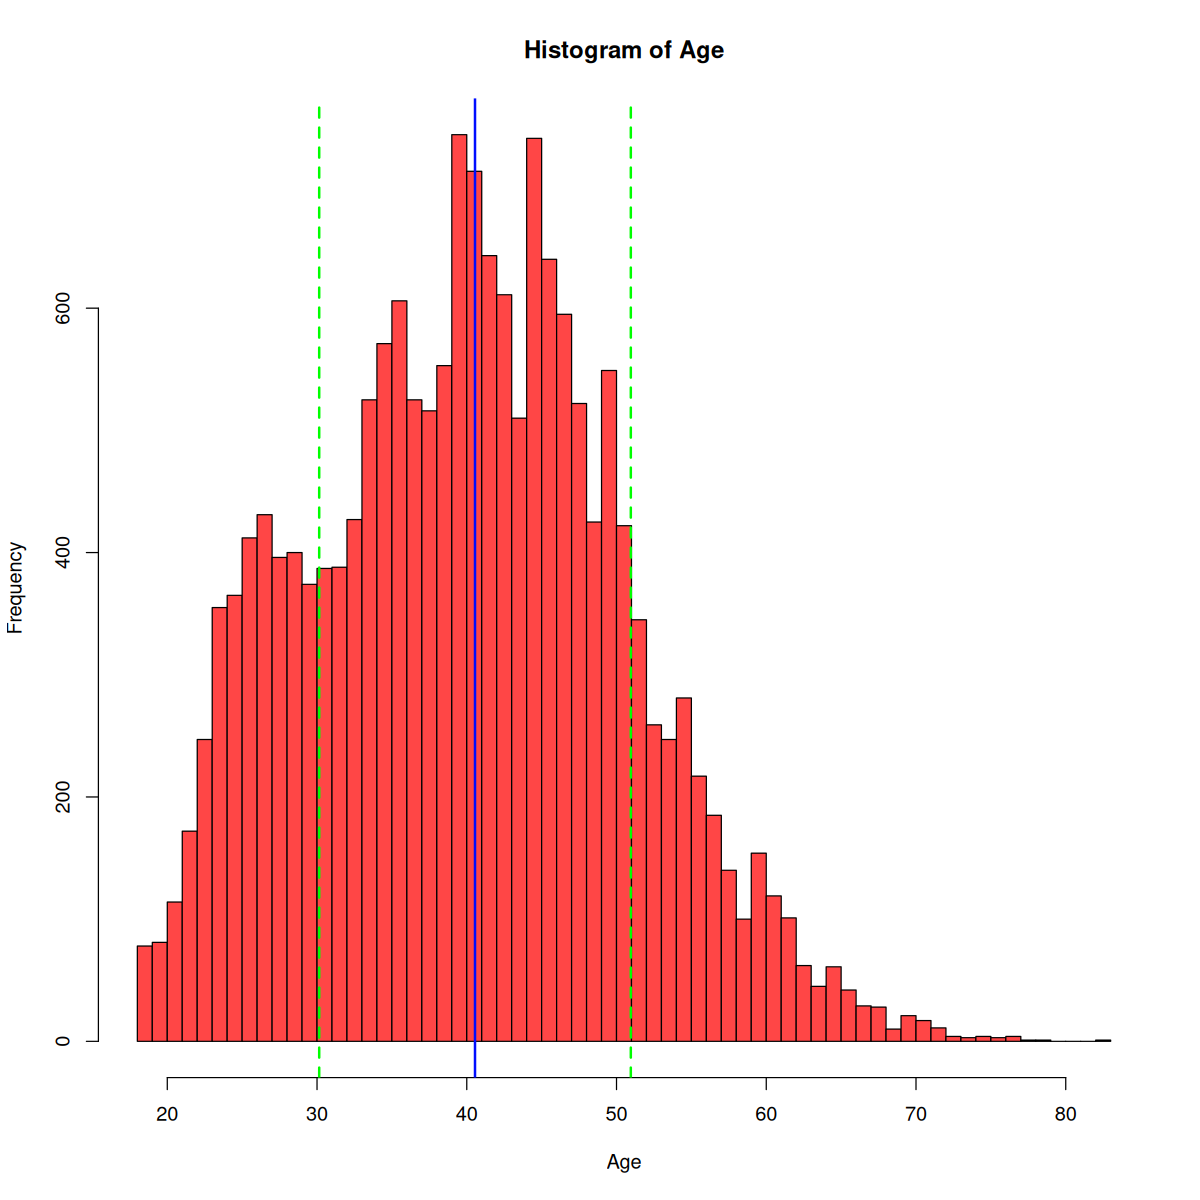

In [81]:
# Calculate mean and standard deviation
mean_age <- mean(maraton_data$age)
sd_age <- sd(maraton_data$age)

# Now plot the histogram
hist(
    maraton_data$age,
    breaks = 50, 
    col = "#ff4646", 
    xlab = "Age", 
    main = "Histogram of Age"
)

# Add mean line
abline(v = mean_age, col = "#000dff", lwd = 2)

# Add standard deviation lines
abline(v = mean_age + sd_age, col = "green", lwd = 2, lty = 2)
abline(v = mean_age - sd_age, col = "green", lwd = 2, lty = 2)

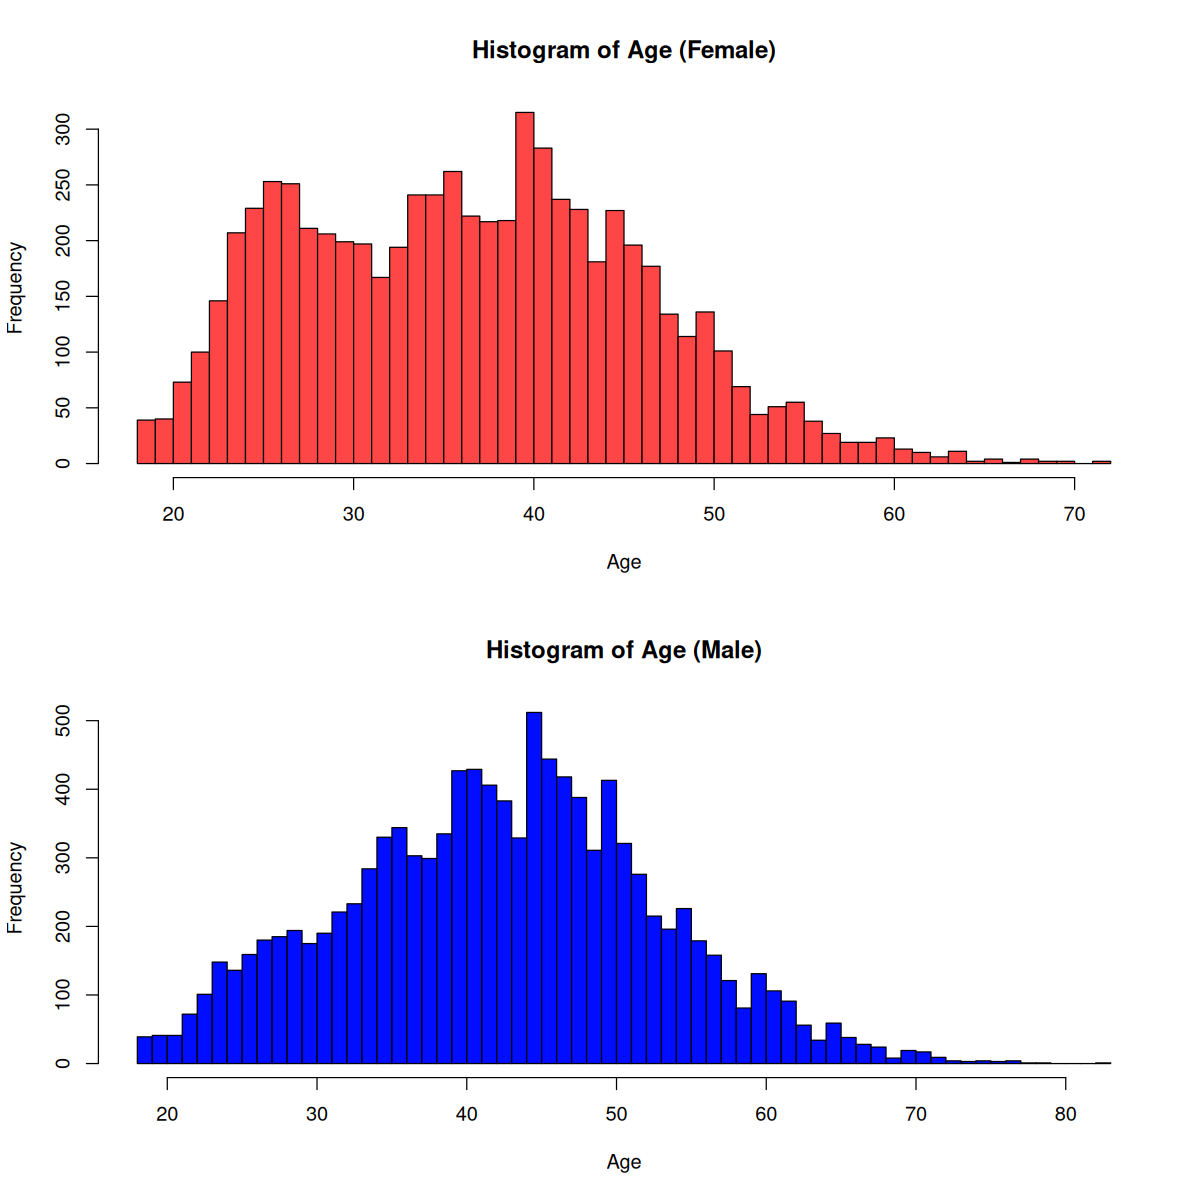

In [82]:
# Split the data frame by gender
gender_data <- split(maraton_data, maraton_data$gender)

# Create separate histograms for each gender
par(mfrow = c(2, 1))  # Set the layout to 2 rows and 1 column

# Histogram for females
hist(
  gender_data$F$age,
  breaks = 50,
  col = "#ff4646",
  xlab = "Age",
  main = "Histogram of Age (Female)"
)

# Histogram for males
hist(
  gender_data$M$age,
  breaks = 50,
  col = "#000dff",
  xlab = "Age",
  main = "Histogram of Age (Male)"
)


Warning message in abline(model, col = "#eaff00", lwd = 2):
“only using the first two of 3 regression coefficients”


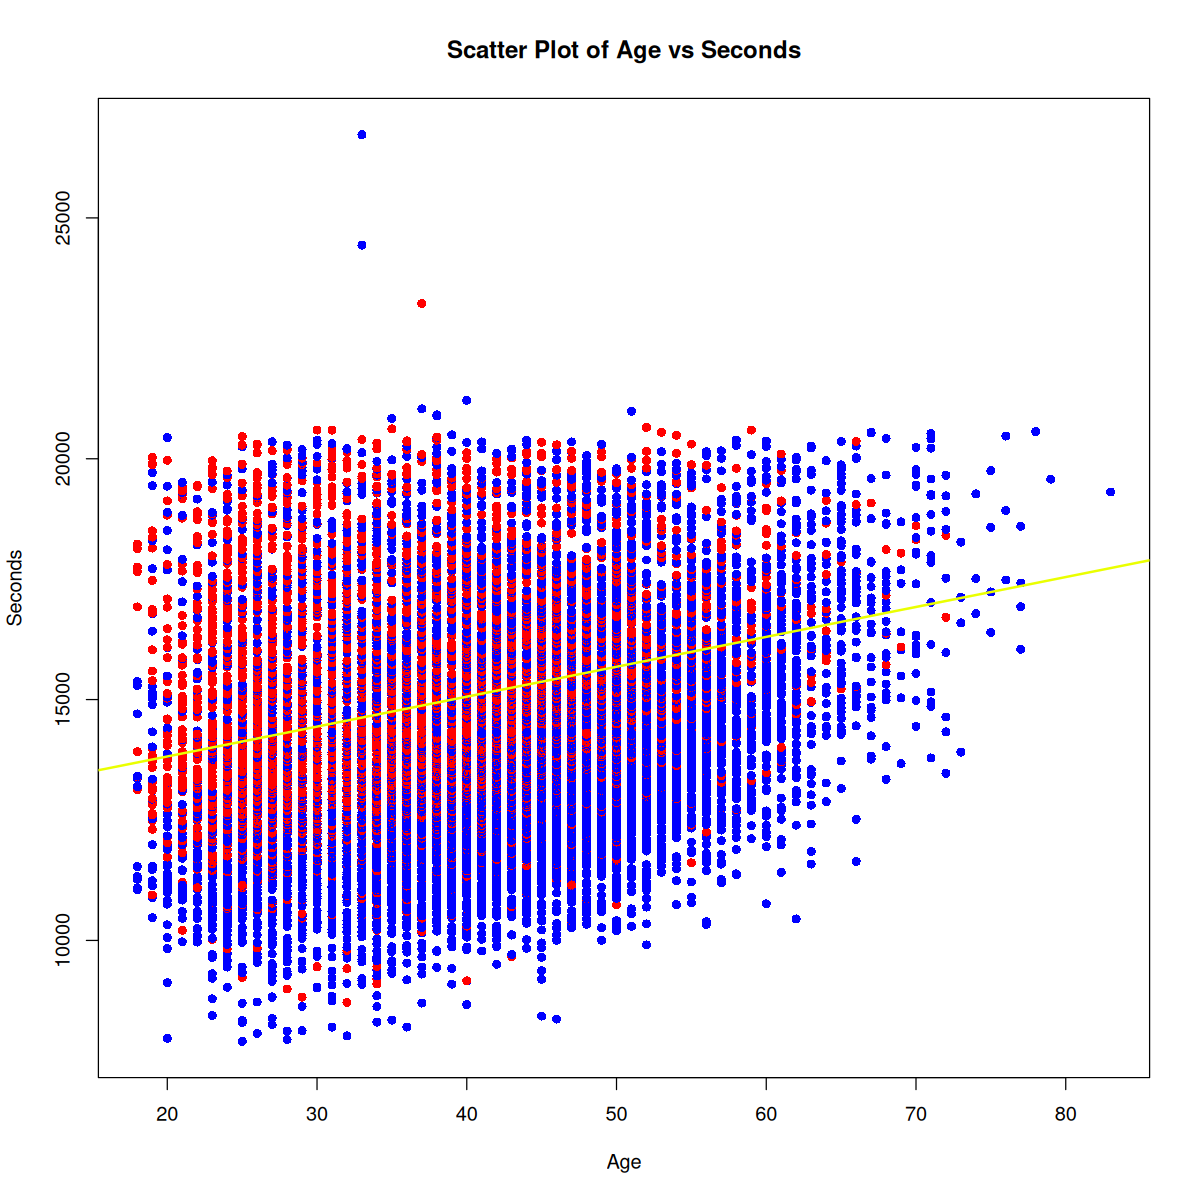

In [83]:
# Scatter plot of age vs seconds with color differentiation by gender
plot(
    maraton_data$age, 
    maraton_data$seconds, 
    col = ifelse(maraton_data$gender == "M", "blue", "red"),
    xlab = "Age", 
    ylab = "Seconds", 
    main = "Scatter Plot of Age vs Seconds",
    pch = 16)

model <- lm(maraton_data$seconds ~ maraton_data$age + maraton_data$gender)

# add line to scatter plot
abline(model, col = "#eaff00", lwd = 2)

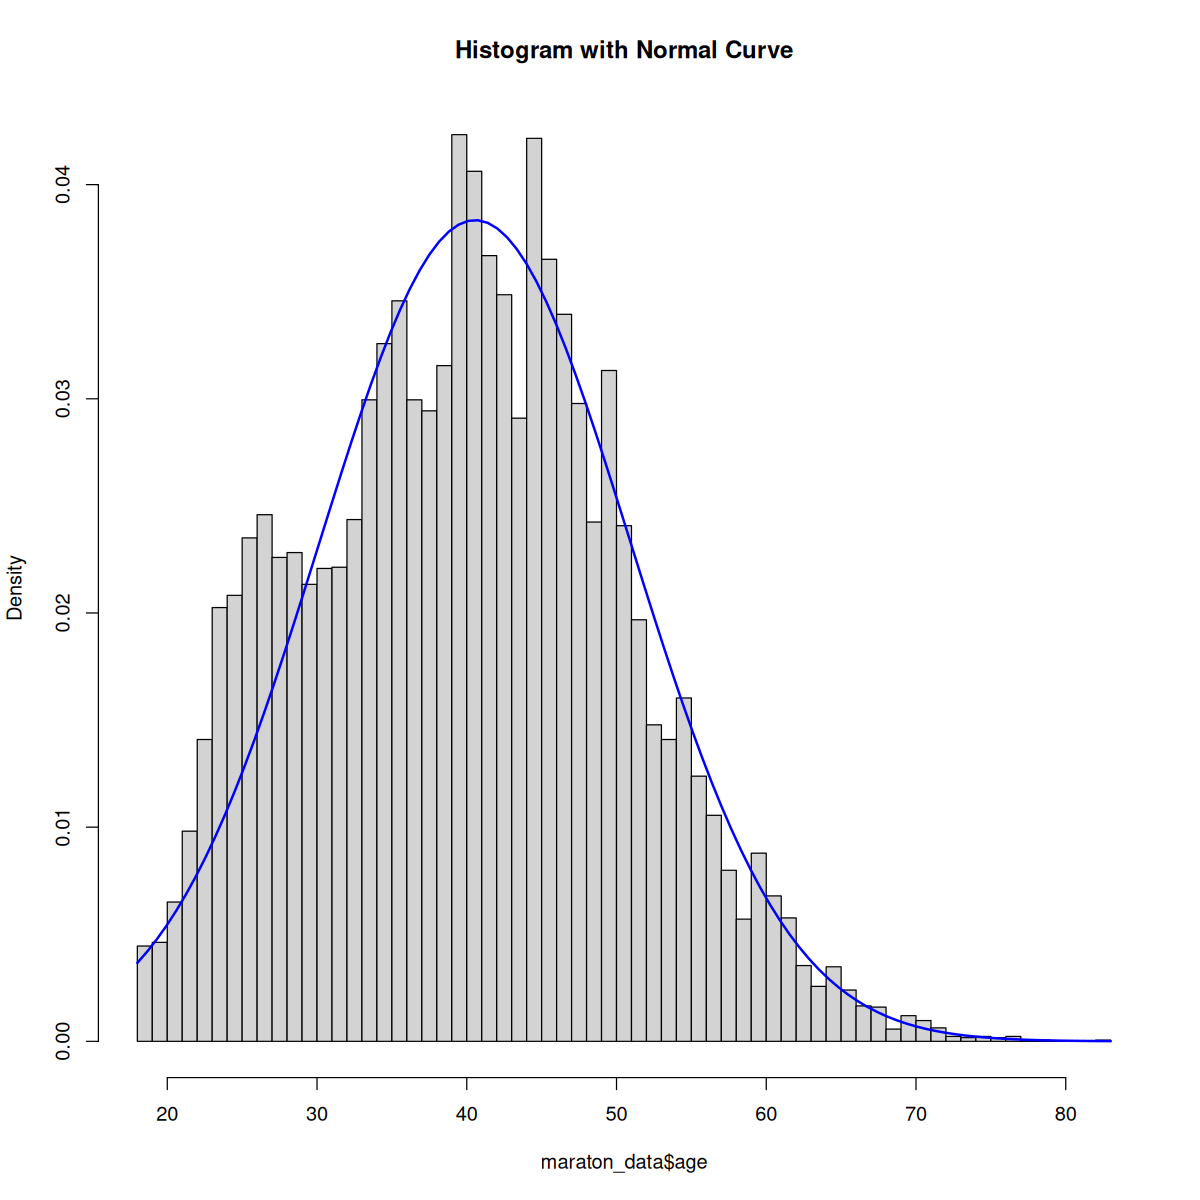

In [84]:
# plot a normal distribution curve in the histogram of ages to see if it fits
hist(
      maraton_data$age,
      breaks = 50, 
      freq = FALSE, 
      main = "Histogram with Normal Curve"
)
curve(dnorm(x, mean = mean(maraton_data$age), sd = sd(maraton_data$age)), 
      add = TRUE, col = "blue", lwd = 2)

In [85]:
correlation <- cor(maraton_data$age, maraton_data$seconds)

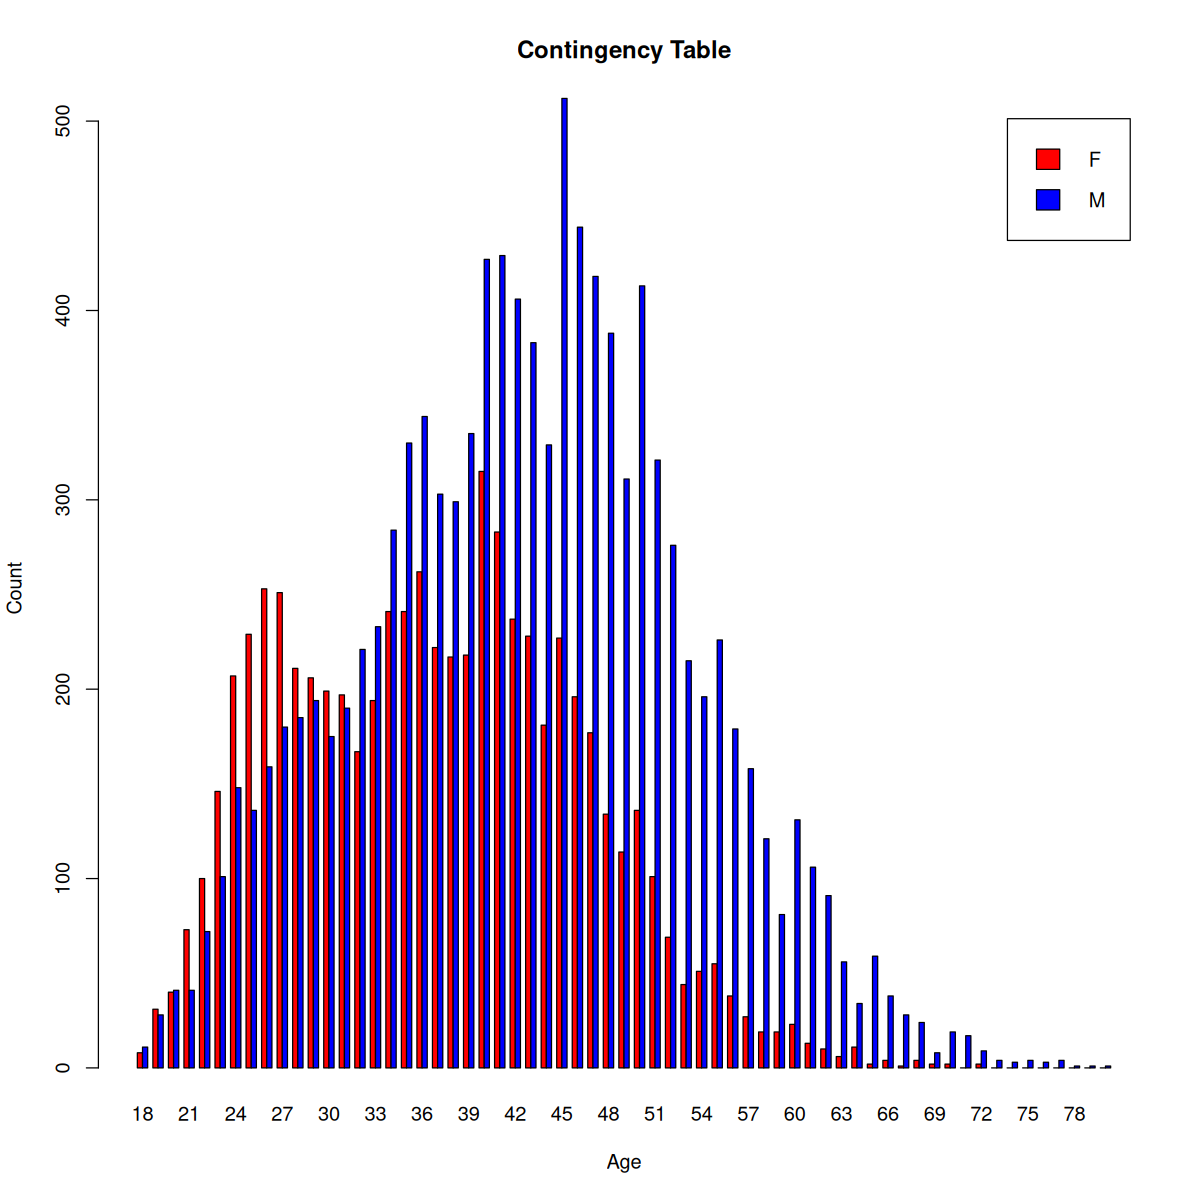

In [86]:
# Create a contingency table
contingency_table <- table(maraton_data$gender, maraton_data$age)
barplot(
    contingency_table,
    beside = TRUE, 
    legend = TRUE, 
    xlab = "Age", 
    ylab = "Count", 
    main = "Contingency Table", 
    col = c("red", "blue")
)


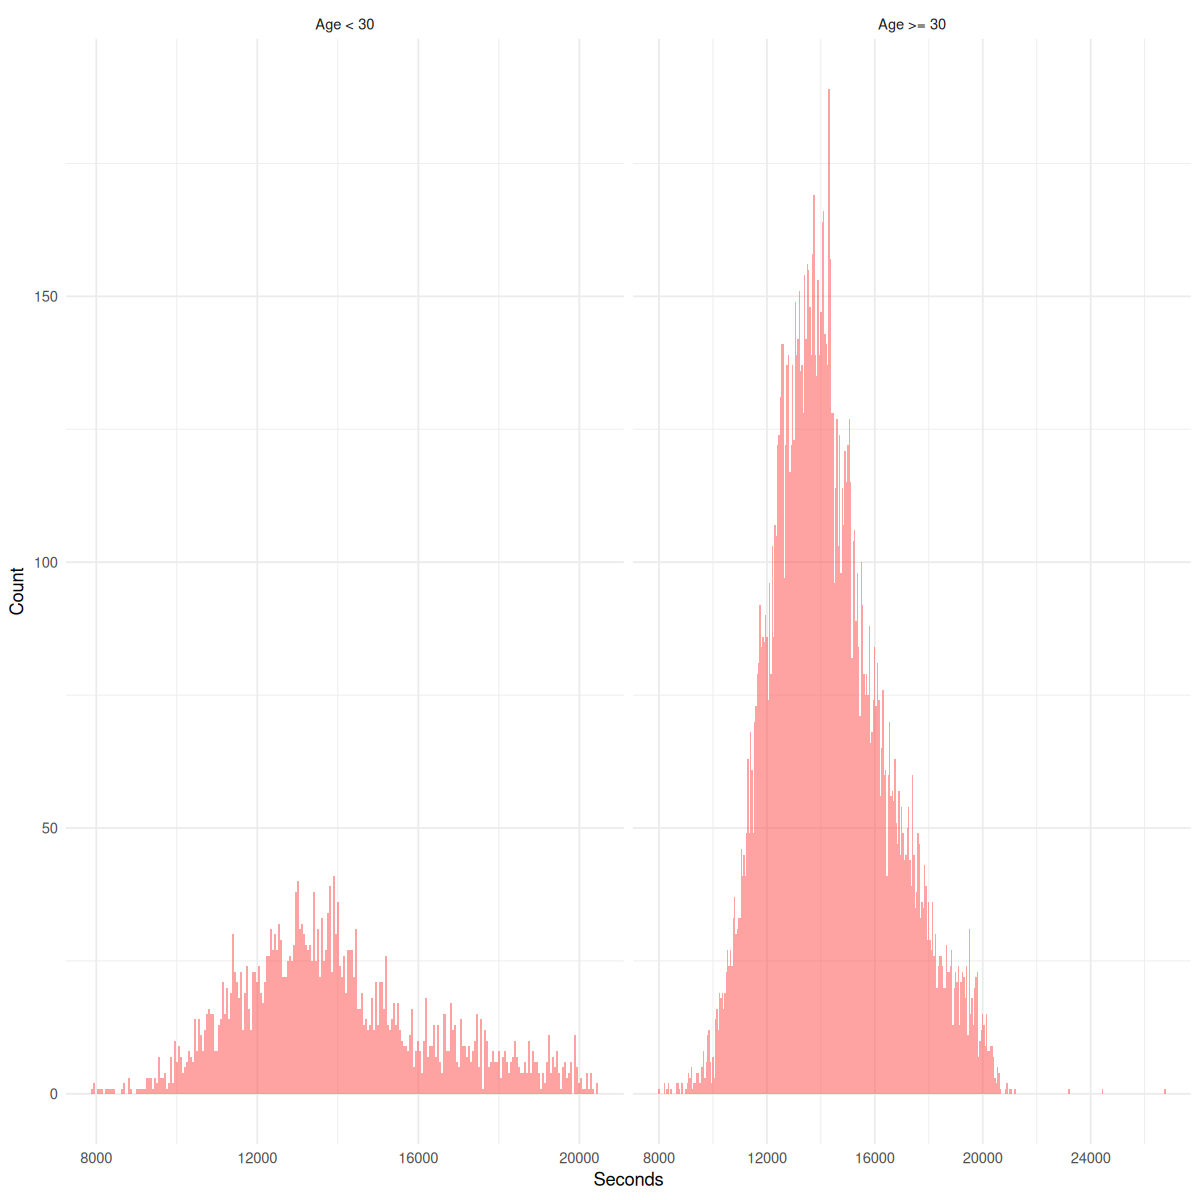

In [87]:
library(ggplot2)

# Create a new column 'AgeGroup' based on the age condition
maraton_data$AgeGroup <- ifelse(maraton_data$age < 30, "Age < 30", "Age >= 30")

# Plot using ggplot2
ggplot(maraton_data, aes(x = seconds)) +
 geom_histogram(binwidth = 50, fill = "#ff4646", alpha = 0.5) +
 facet_wrap(~ AgeGroup, scales = "free_x") +
 labs(x = "Seconds", y = "Count", fill = "Age Group") +
 theme_minimal()

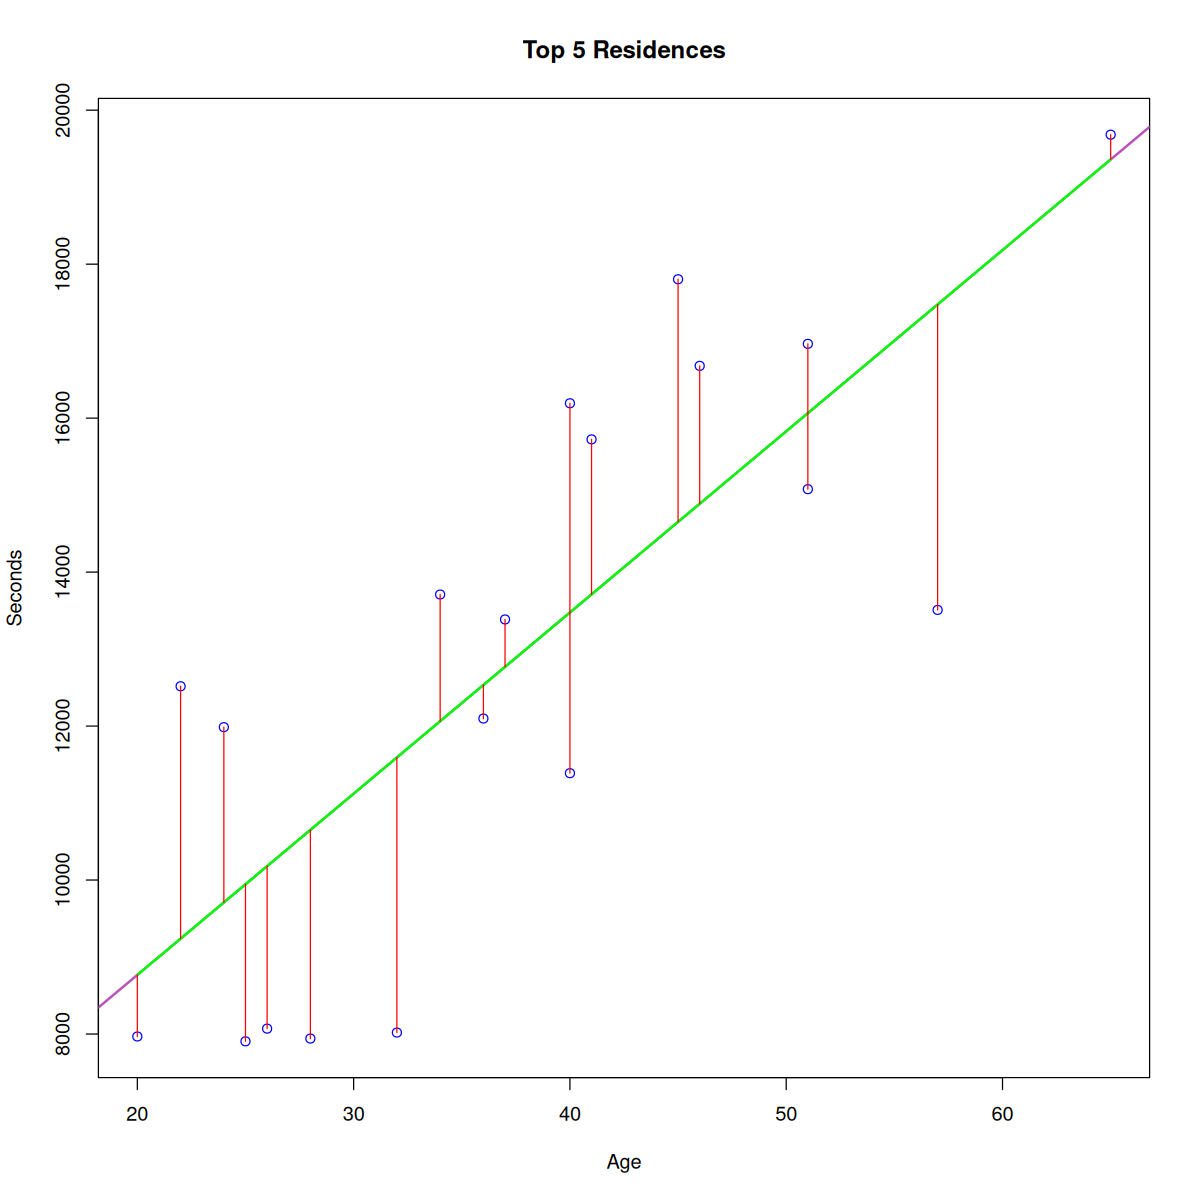

In [88]:
# Get the top 20 rows of the residences column
top_residences <- head(maraton_data$residence, 5)

top_age <- maraton_data$age[maraton_data$residence %in% top_residences]
top_seconds <- maraton_data$seconds[maraton_data$residence %in% top_residences]

plot(
    x = top_age,
    y = top_seconds, 
    col = ifelse(maraton_data$gender == "M", "blue", "red"),
    xlab = "Age", 
    ylab = "Seconds", 
    main = "Top 5 Residences"
)

lm_model <- lm(top_seconds ~ top_age)
abline(lm_model, col = "#B753B9", lwd = 2)

# Add lines for fitted values and residuals
lines(top_age, fitted(lm_model), col = "green", lwd = 2)
segments(top_age, top_seconds, top_age, fitted(lm_model), col = "red", lwd = 1)


In [89]:
# Define the age groups
age_groups <- cut(
    maraton_data$age,
    breaks = c(0, 20, 30, 40, 50, Inf), 
    labels = c("0-20", "21-30", "31-40", "41-50", "51+")
)

# Add the age groups as a new column in the dataframe
maraton_data$AgeGroup <- age_groups

head(maraton_data)


,display_name,age,gender,residence,pace,official_time,overall,gender_result,division_result,seconds,first_name,last_name,AgeGroup
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<fct>
1,Hailu Negussie,25,M,Showa,00:05:01,2:11:45,1,1,1,7905,Hailu,Negussie,21-30
2,Wilson Onsare,28,M,Nairobi,00:05:02,2:12:21,2,2,2,7941,Wilson,Onsare,21-30
3,Benson Cherono,20,M,Baringo,00:05:03,2:12:48,3,3,1,7968,Benson,Cherono,0-20
4,Alan Culpepper,32,M,Lafayette,00:05:05,2:13:39,4,4,1,8019,Alan,Culpepper,31-40
5,Robert Kipkoech Cheruiyot,26,M,Nandi District,00:05:07,2:14:30,5,5,3,8070,Robert Kipkoech,Cheruiyot,21-30
6,Timothy Cherigat,28,M,,00:05:09,2:15:19,6,6,4,8119,Timothy,Cherigat,21-30


               Df      Sum Sq    Mean Sq F value              Pr(>F)    
AgeGroup        4  4166751539 1041687885   223.7 <0.0000000000000002 ***
Residuals   17523 81592086187    4656285                                
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


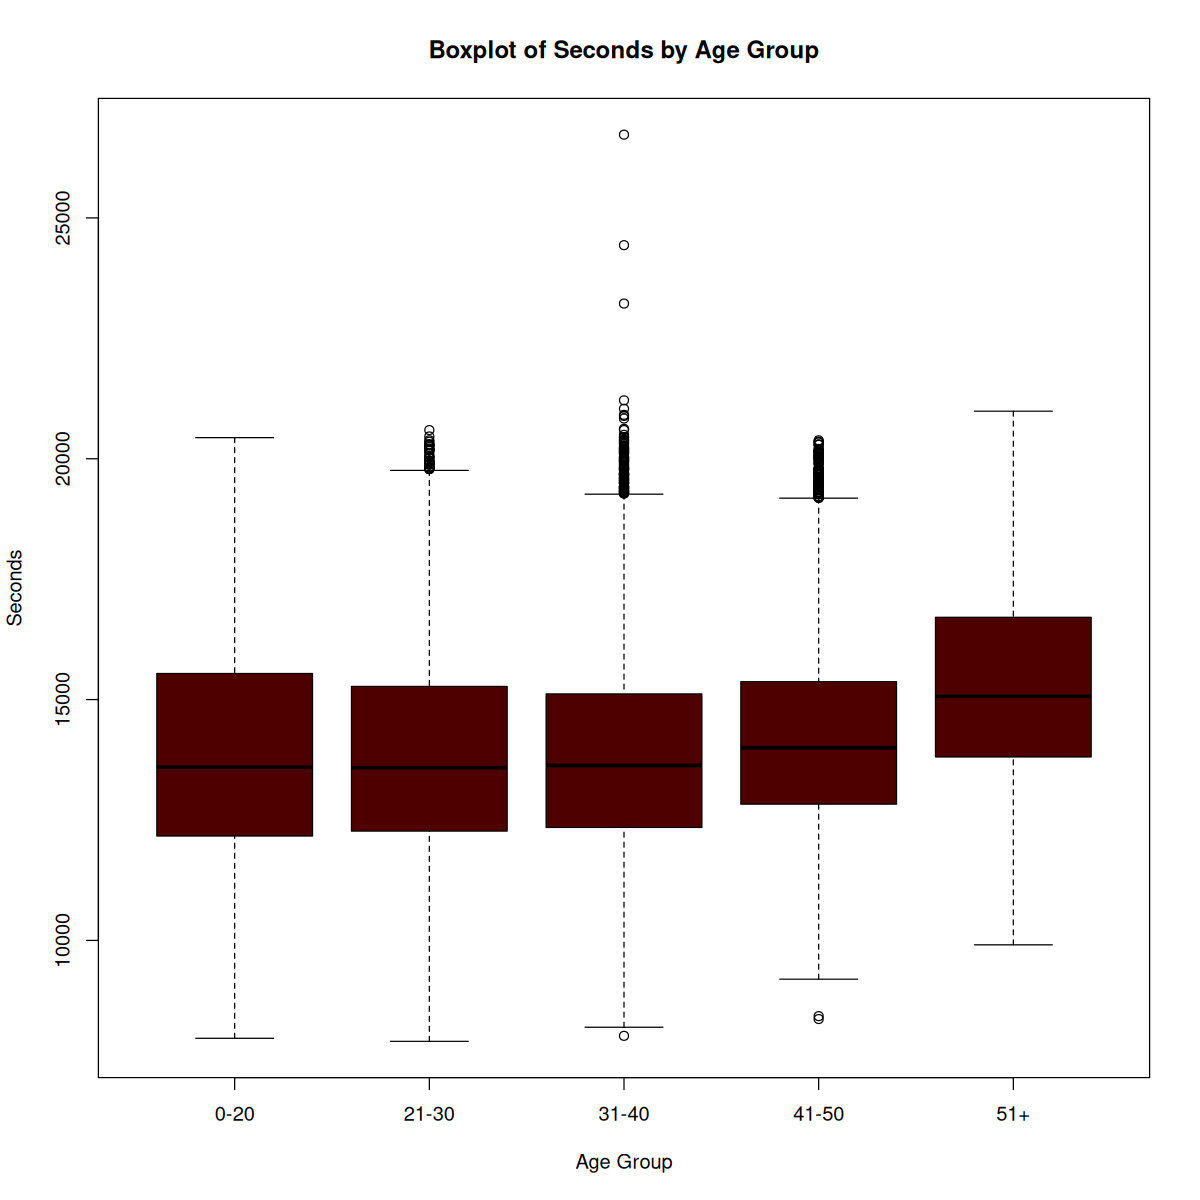

In [90]:
# Perform ANOVA on age groups
anova_result <- aov(seconds ~ AgeGroup, data = maraton_data)

# Print the ANOVA table
print(summary(anova_result))
# Create a boxplot
boxplot(
    seconds ~ AgeGroup,
    data = maraton_data,
    col = "#4e0000",
    xlab = "Age Group",
    ylab = "Seconds",
    main = "Boxplot of Seconds by Age Group"
)

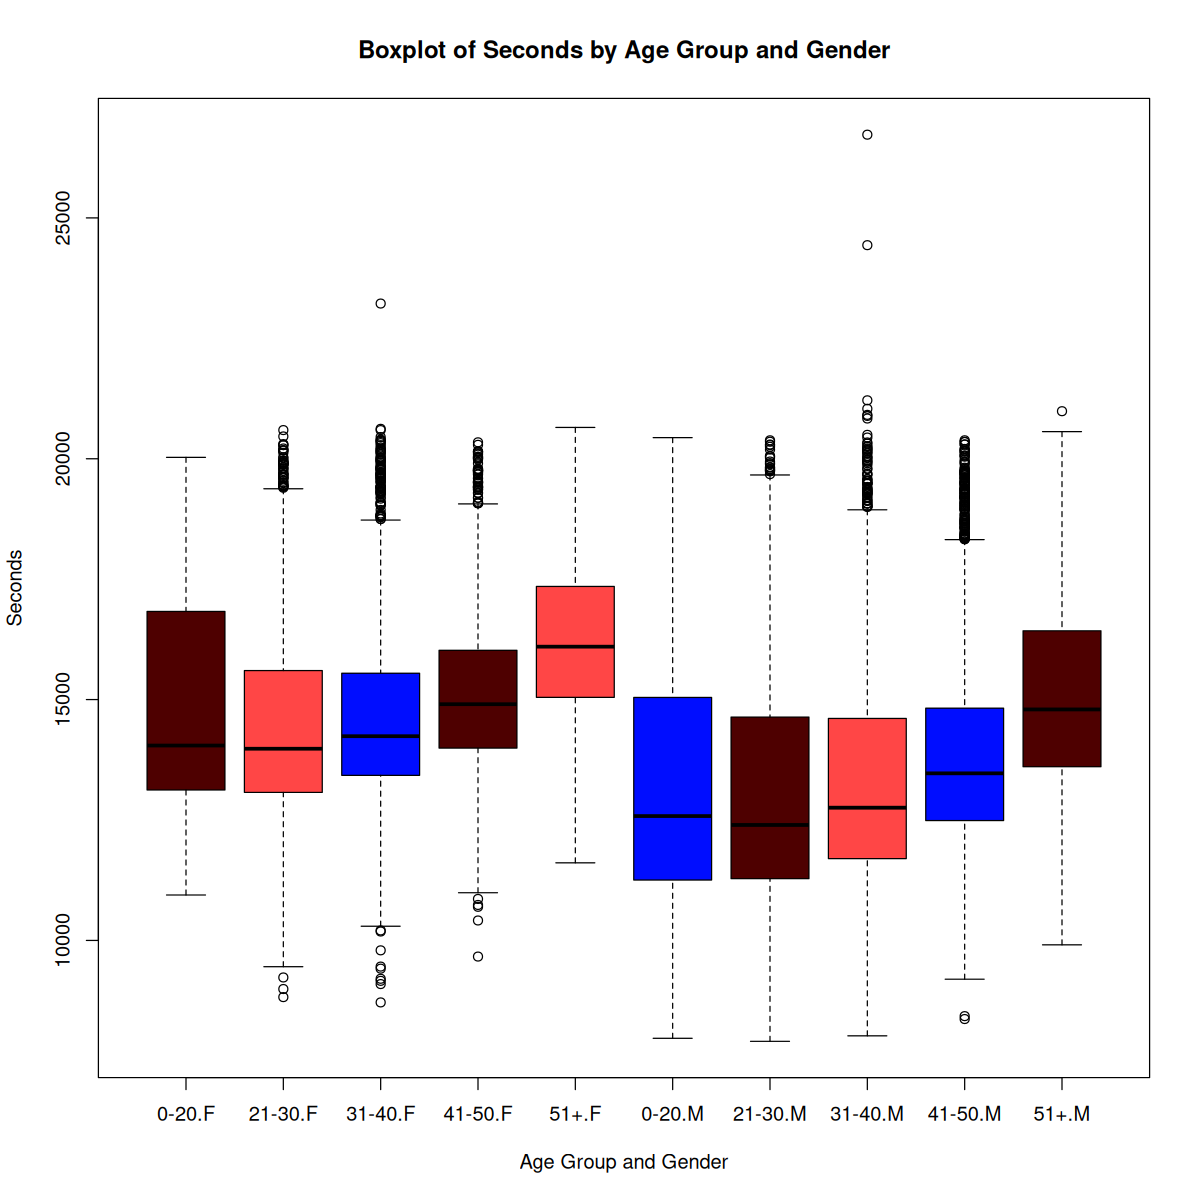

In [91]:
# Create a factor variable combining AgeGroup and gender
maraton_data$AgeGender <- interaction(
  maraton_data$AgeGroup, maraton_data$gender
)

# Calculate the mean for each AgeGender group
mean_seconds <- tapply(maraton_data$seconds, maraton_data$AgeGender, mean)

# Plot the boxplot with abline and color differentiation
boxplot(
  seconds ~ AgeGender,
  data = maraton_data,
  col = c("#4e0000", "#ff4646", "#000dff"),
  xlab = "Age Group and Gender",
  ylab = "Seconds",
  main = "Boxplot of Seconds by Age Group and Gender"
)


In [ ]:
maraton_data$gender_numeric <- ifelse(maraton_data$gender == "M", 0, 1)

maraton_data <- na.omit(maraton_data)

model <- lm(
    gender_numeric ~ age + seconds,
    data = maraton_data
)

summary(model)



Call:
lm(formula = gender_numeric ~ age + seconds, data = maraton_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2800 -0.3332 -0.1749  0.4758  1.0108 

Coefficients:
                Estimate   Std. Error t value             Pr(>|t|)    
(Intercept)  0.109151282  0.023688315   4.608            0.0000041 ***
age         -0.015458302  0.000331950 -46.568 < 0.0000000000000002 ***
seconds      0.000062891  0.000001561  40.279 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4468 on 17525 degrees of freedom
Multiple R-squared:  0.1518,	Adjusted R-squared:  0.1517 
F-statistic:  1568 on 2 and 17525 DF,  p-value: < 0.00000000000000022


Warning message:
“'newdata' had 200 rows but variables found have 17528 rows”


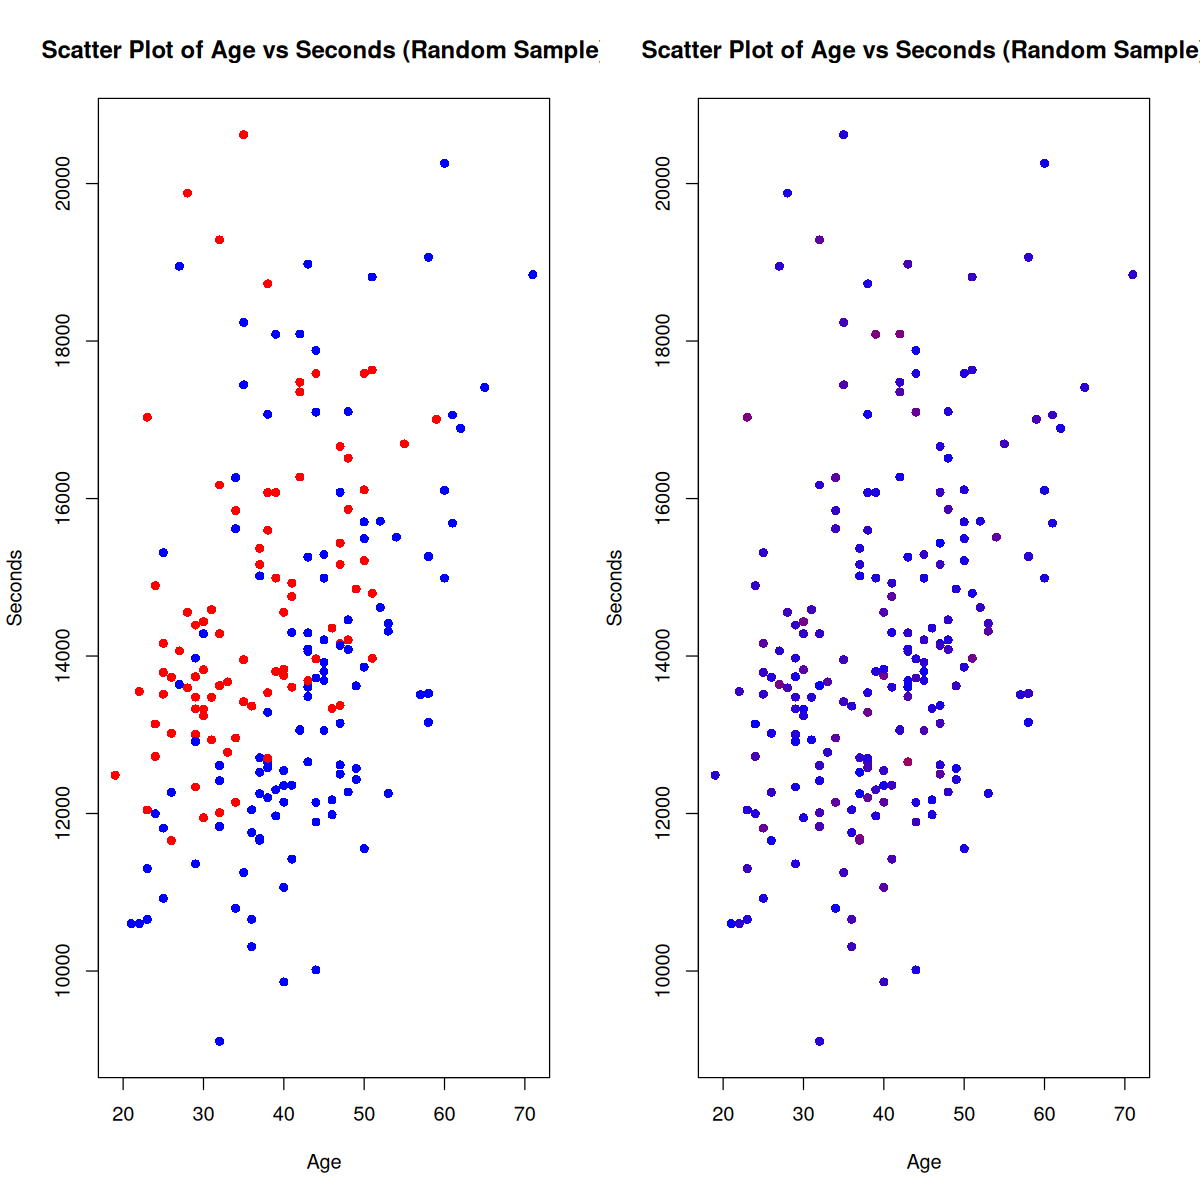

In [95]:
# Set the seed for reproducibility
set.seed(123)

# Get 100 random row indices
random_indices <- sample(nrow(maraton_data), 200)

# Get the corresponding random rows
random_rows <- maraton_data[random_indices, ]

# Perform prediction on the random rows
predictions <- predict(model, newdata = random_rows)

# Set the layout to 1 row and 2 columns
par(mfrow = c(1, 2))

# Plot 1: Scatter plot of age vs seconds with color differentiation by gender
plot(
    random_rows$age, 
    random_rows$seconds, 
    col = ifelse(random_rows$gender == "M", "blue", "red"),
    xlab = "Age", 
    ylab = "Seconds", 
    main = "Scatter Plot of Age vs Seconds (Random Sample)",
    pch = 16
)

# Create a color gradient function
color_gradient_func <- colorRampPalette(c("blue", "red"))

# Normalize the predictions to be between 0 and 1
normalized_predictions <- 
    (predictions - min(predictions)) / (max(predictions) - min(predictions))

# Generate the colors for the plot
colors <- color_gradient_func(100)[floor(normalized_predictions * 99) + 1]

# Plot 2: Scatter plot of age vs seconds with color differentiation by predicted values
plot(
    random_rows$age, 
    random_rows$seconds, 
    col = colors,
    xlab = "Age", 
    ylab = "Seconds", 
    main = "Scatter Plot of Age vs Seconds (Random Sample)",
    pch = 16
)


# Set the default plot size to be larger